In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('./fp-historical-wildfire-data-2006-2021.csv')

In [3]:
df.shape

(22914, 50)

<Axes: >

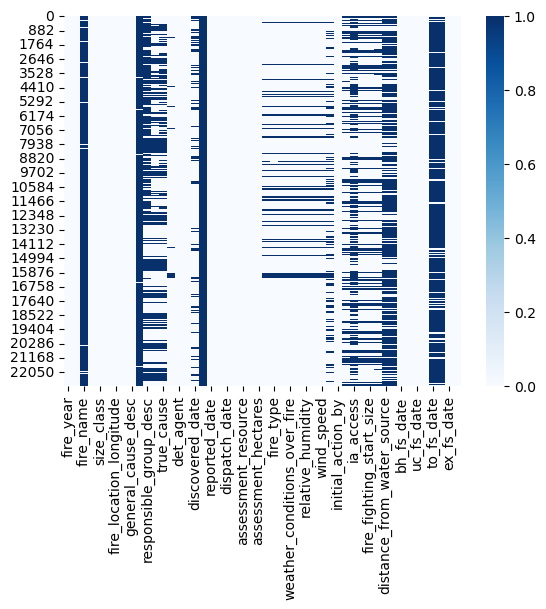

In [4]:
import seaborn as sns
sns.heatmap(df.isna(), cmap='Blues')

In [9]:
nulls = df.isna().sum()
nulls[nulls > 10000].sort_values(ascending=False)

discovered_size               22914
industry_identifier_desc      22506
fire_name                     22310
to_fs_date                    20470
to_hectares                   20470
distance_from_water_source    16549
first_bucket_drop_date        16549
responsible_group_desc        13883
ia_access                     12838
true_cause                    10426
dtype: int64

In [11]:
df.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,NaN,2021-06-28 22:26,0.01,2021-07-01 13:26,10.00,NaN,NaN,2021-07-01 13:44,5.50
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,NaN,2021-03-30 14:30,0.01,2021-03-30 14:30,0.01,2021-03-30 14:35,0.01,2021-04-09 8:30,0.01
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,NaN,2021-04-16 16:57,0.10,2021-04-16 16:57,0.10,NaN,NaN,2021-04-17 14:15,0.10
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,NaN,2021-04-17 15:20,0.01,2021-04-17 15:20,0.01,NaN,NaN,2021-04-17 15:24,0.01
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,NaN,2021-04-01 19:10,7.13,2021-04-02 11:00,7.13,2021-04-02 15:52,7.13,2021-04-12 14:30,7.13
